# Analyse du Churn des Clients Telco

## Introduction
Ce notebook analyse les données d'une entreprise de télécommunications pour comprendre les facteurs qui influencent la résiliation des abonnements clients (churn).  
Nous allons explorer et visualiser les données pour répondre aux questions suivantes :
- Quels sont les profils de clients les plus susceptibles de churner ?
- Quels services ou caractéristiques sont associés à un churn élevé ?
- Comment les variables numériques et catégorielles influencent-elles le churn ?

### Importation des bibliothèques
Nous utilisons les bibliothèques suivantes :
- **numpy** : pour des calculs numériques.
- **pandas** : pour manipuler et analyser les données tabulaires.
- **matplotlib** et **seaborn** : pour créer des visualisations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Chemin du fichier CSV contenant les données
path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Chargement des données dans un DataFrame pandas
data = pd.read_csv(path)

### Aperçu des données
Nous affichons les 5 premières lignes du dataset pour mieux comprendre sa structure et les types de colonnes.

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Nettoyage des données
- Nous remplaçons les valeurs "Yes" et "No" par des valeurs numériques (1 et 0) pour faciliter l'analyse.
- Les espaces vides dans la colonne `TotalCharges` sont remplacés par des valeurs manquantes (`NaN`), puis cette colonne est convertie en type numérique.

In [4]:
# Conversion des valeurs 'Yes' et 'No' en 1 et 0 pour les colonnes catégoriques binaires
# Remplacement des espaces vides par NaN (valeurs manquantes)
data.replace({'Yes': 1, 'No': 0, ' ': np.nan}, inplace=True)

# Conversion de la colonne 'TotalCharges' en type float
data['TotalCharges'] = data.TotalCharges.astype(float)

/var/folders/m4/p71xrbqx639250tkt6rzcx940000gn/T/ipykernel_98896/769913106.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Yes': 1, 'No': 0, ' ': np.nan}, inplace=True)


In [5]:
# Vérification que chaque client possède un identifiant unique
data['customerID'].is_unique

True

### Exploration des données
Nous analysons le dataset pour :
1. Comprendre les types de colonnes, les valeurs manquantes et les tailles de chaque champ (`data.info()`).
2. Obtenir des statistiques descriptives pour les colonnes numériques (`data.describe()`).
3. Identifier les colonnes avec des valeurs manquantes (`data.isna().sum()`).

In [6]:
# Obtenir un résumé des colonnes, types et valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [7]:
# Calculer des statistiques descriptives pour les colonnes numériques
num = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[num].describe(percentiles=np.arange(0.1, 1, 0.1))

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
10%,2.000000,20.050000,84.600000
20%,6.000000,25.050000,267.070000
30%,12.000000,45.850000,551.995000
40%,20.000000,58.830000,944.170000
50%,29.000000,70.350000,1397.475000
60%,40.000000,79.100000,2048.950000


In [8]:
# Vérifier le nombre de valeurs manquantes par colonne
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Traitement des valeurs manquantes
Nous identifions et supprimons les lignes contenant des valeurs manquantes dans la colonne `TotalCharges`. Ces valeurs représentent un faible pourcentage du dataset.

In [9]:
# Calculer le pourcentage de valeurs manquantes dans la colonne 'TotalCharges'
pourcentage = (data.TotalCharges.isna().sum() / data.shape[0]) * 100
print(f'il y a {round(pourcentage, 2)} pourcents de valeurs nulles dans la colonne TotalCharges')

# Supprimer les lignes avec des valeurs manquantes dans 'TotalCharges'
data.TotalCharges.dropna(inplace=True)

il y a 0.16 pourcents de valeurs nulles dans la colonne TotalCharges


### Analyse des catégories de Churn
Nous analysons la répartition des clients ayant churné (`Churn=1`) et ceux qui sont restés (`Churn=0`) :
- Le comptage brut (`value_counts()`).
- Les proportions en pourcentage (`value_counts(normalize=True)`).

In [10]:
# Comptage des valeurs uniques dans la colonne 'Churn'
data.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [11]:
# Calculer les proportions (%) pour chaque valeur dans 'Churn'
data.Churn.value_counts(normalize=True) * 100

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

### Analyse des moyennes par Churn
Nous calculons les moyennes des colonnes numériques (`tenure`, `MonthlyCharges`, `TotalCharges`) en fonction de la variable `Churn`. Cela permet d’observer les différences de comportement entre les clients qui résilient et ceux qui restent.

In [12]:
data.groupby('Churn')[num].mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
0,37.569965,61.265124,2555.344141
1,17.979133,74.441332,1531.796094


### Analyse des moyennes par type de contrat
Nous comparons les moyennes des colonnes numériques (`tenure`, `MonthlyCharges`, `TotalCharges`) pour chaque type de contrat (`Month-to-month`, `One year`, `Two year`). Cela aide à identifier des tendances liées aux durées d’engagement.

In [13]:
data.groupby('Contract')[num].mean()

,tenure,MonthlyCharges,TotalCharges
Contract,,,
Month-to-month,18.036645,66.398490,1369.254581
One year,42.044807,65.048608,3034.683084
Two year,56.735103,60.770413,3728.933947


In [14]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Distribution des colonnes numériques
Nous traçons des histogrammes pour les colonnes numériques (`tenure`, `MonthlyCharges`, `TotalCharges`) afin de visualiser leurs distributions et identifier des schémas ou anomalies éventuelles.

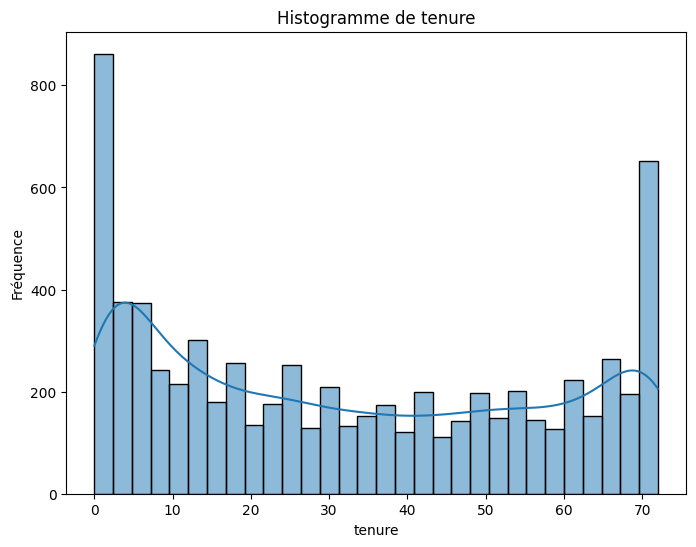

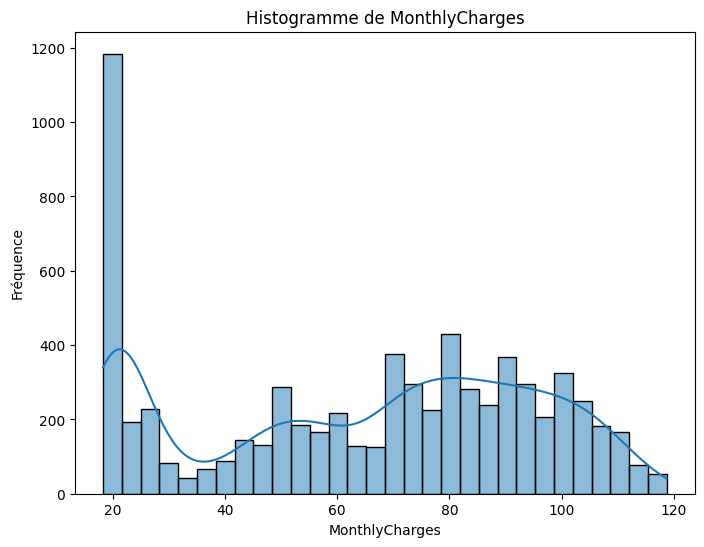

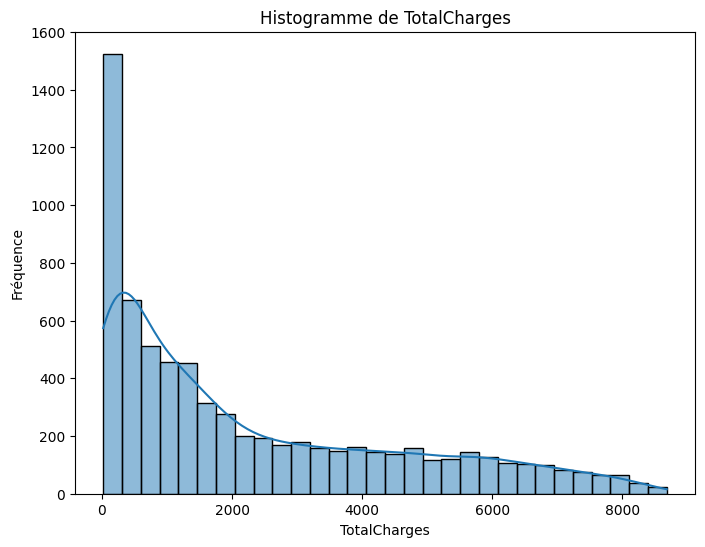

In [15]:
# Histogrammes
for col in num:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, kde=True, bins=30)
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()


### Boîtes à moustaches des colonnes numériques
Nous utilisons des boîtes à moustaches pour explorer les distributions des colonnes numériques et détecter des valeurs atypiques dans les données.

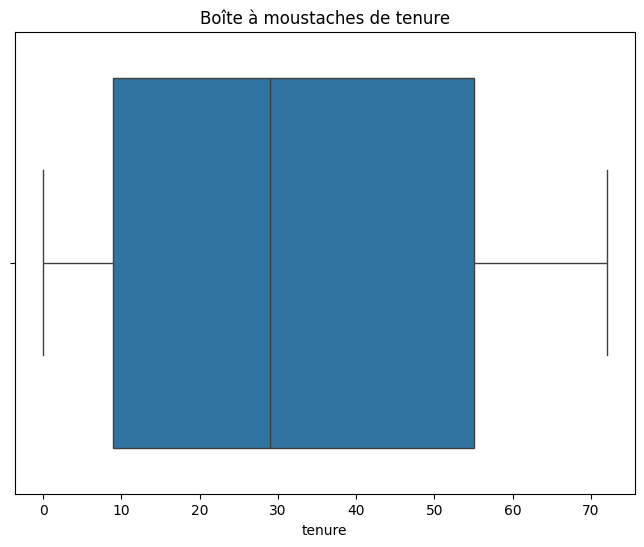

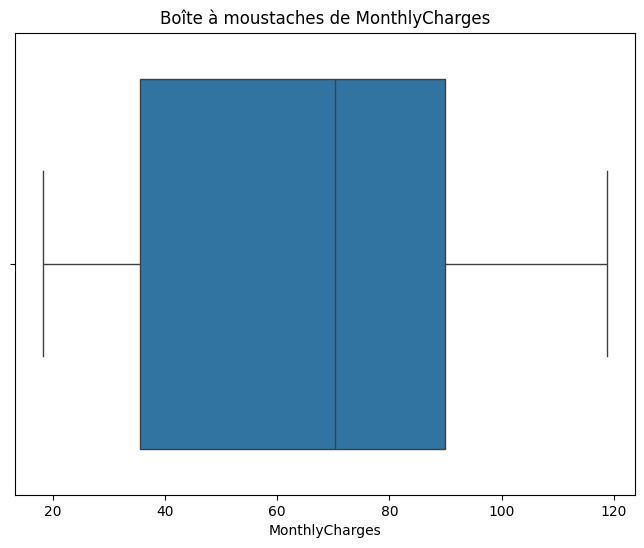

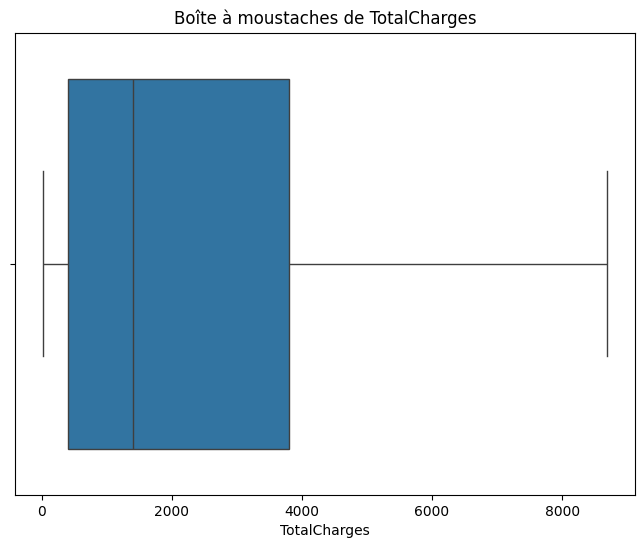

In [16]:
# Boîtes à moustaches
for col in num:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=col, orient='h')
    plt.title(f'Boîte à moustaches de {col}')
    plt.xlabel(col)
    plt.show()

### Matrice de corrélation
Nous utilisons une matrice de corrélation (méthode Spearman) pour visualiser les relations entre les colonnes numériques et identifier les associations importantes avec la variable `Churn`.

In [17]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [18]:
num_target = data[num_cols]

In [19]:
correlations = num_target.corr(method='spearman')

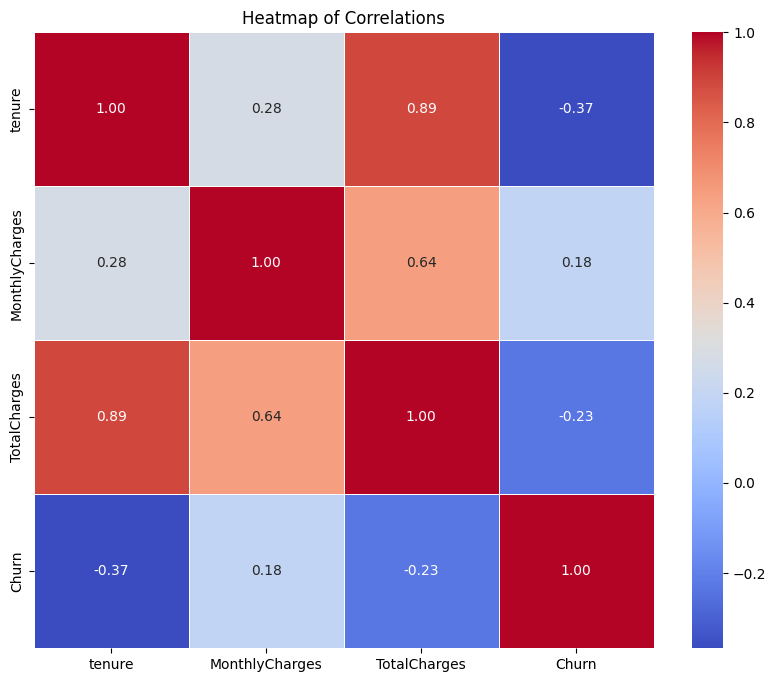

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Heatmap of Correlations')
plt.show()

### Impact des colonnes catégorielles sur le Churn
Pour chaque colonne catégorielle (par exemple, `Contract`, `PaymentMethod`, etc.), nous traçons un graphique en barres qui montre la répartition des clients par catégorie, avec une différenciation selon la variable `Churn`.

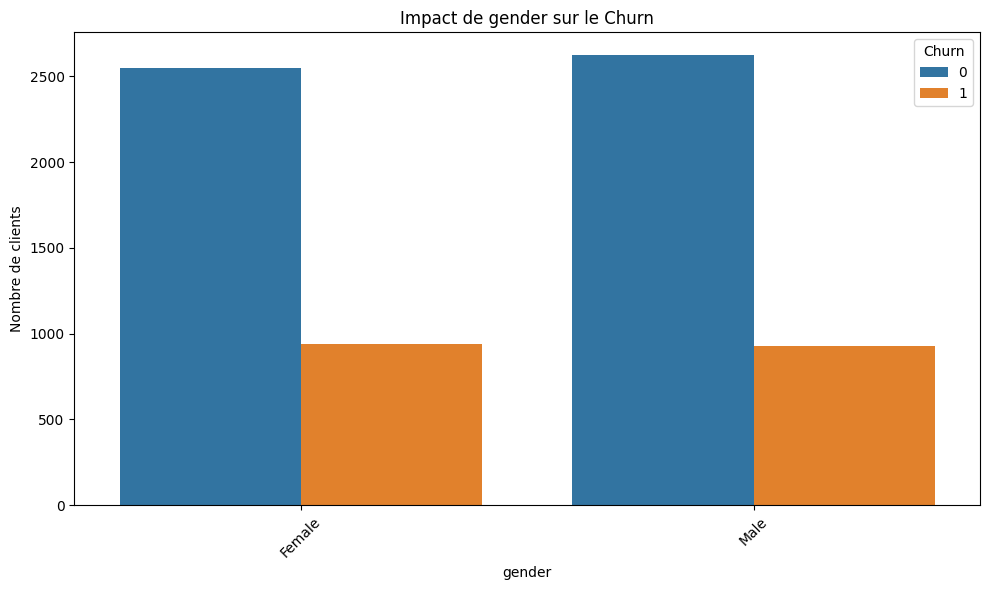

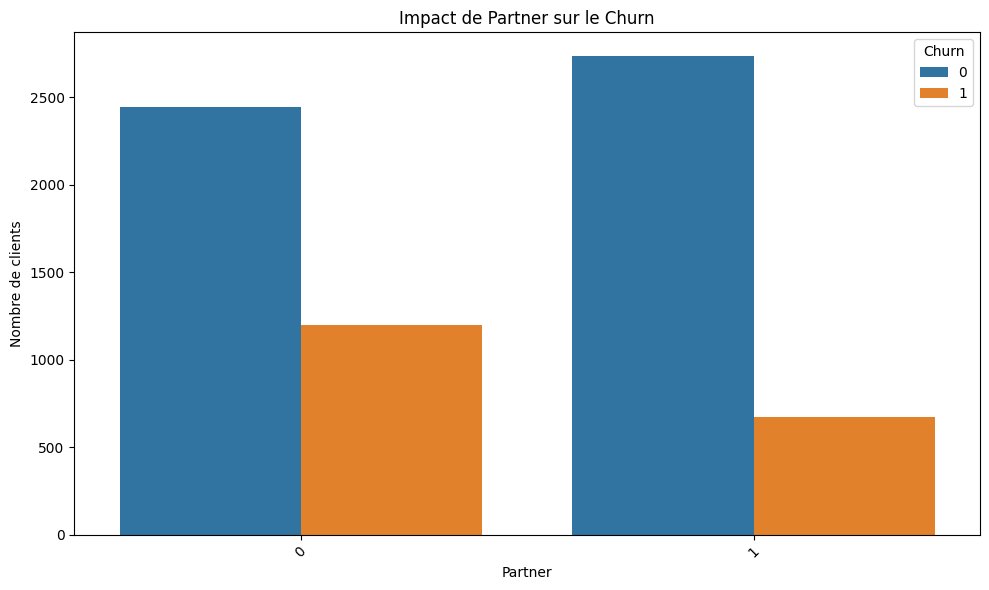

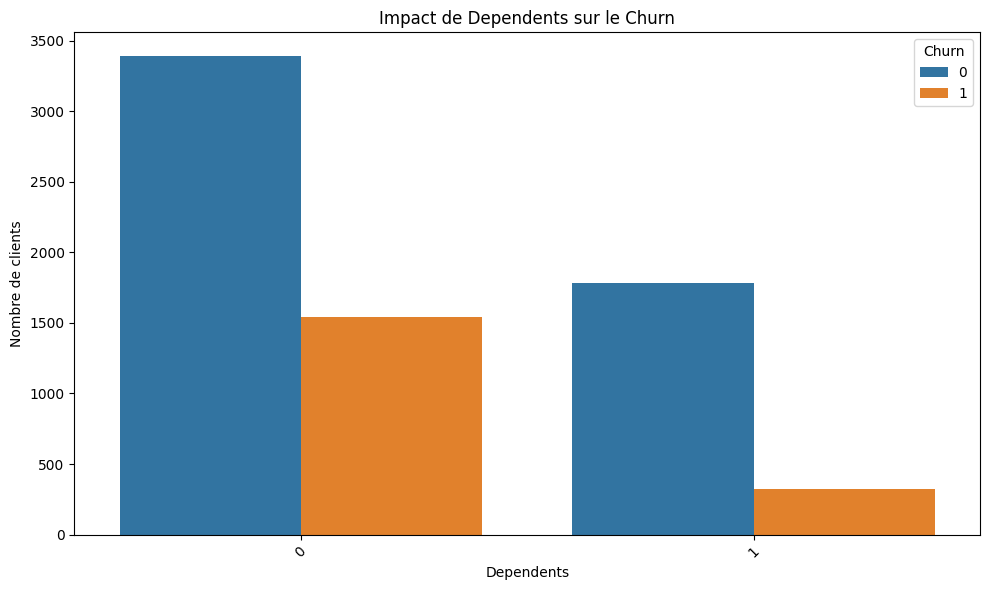

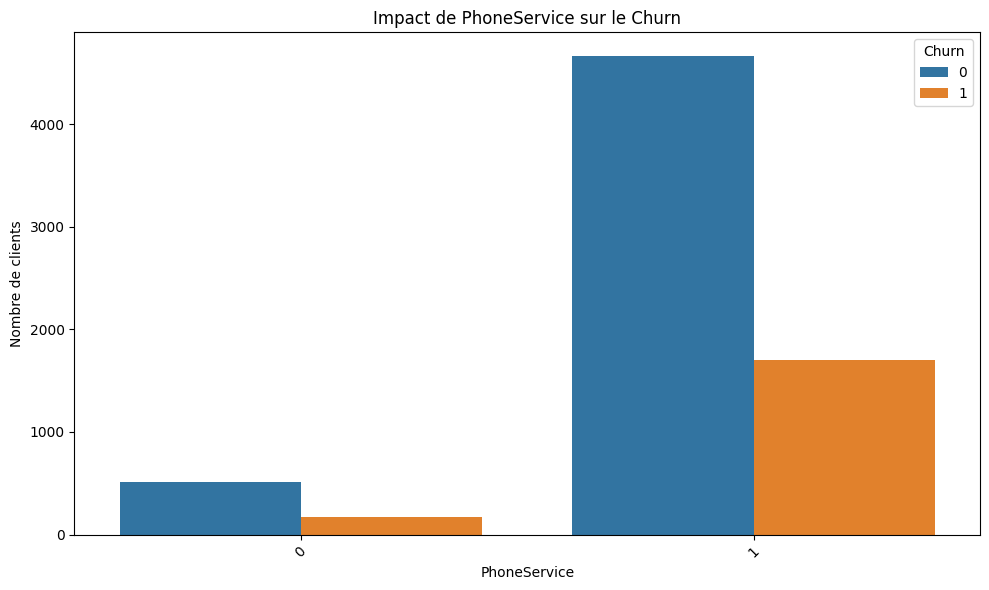

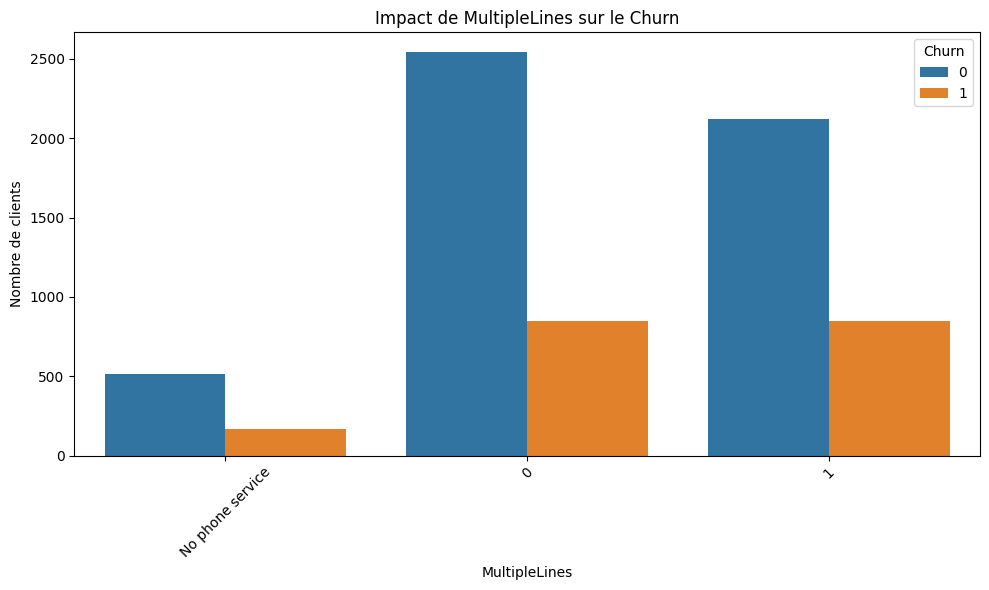

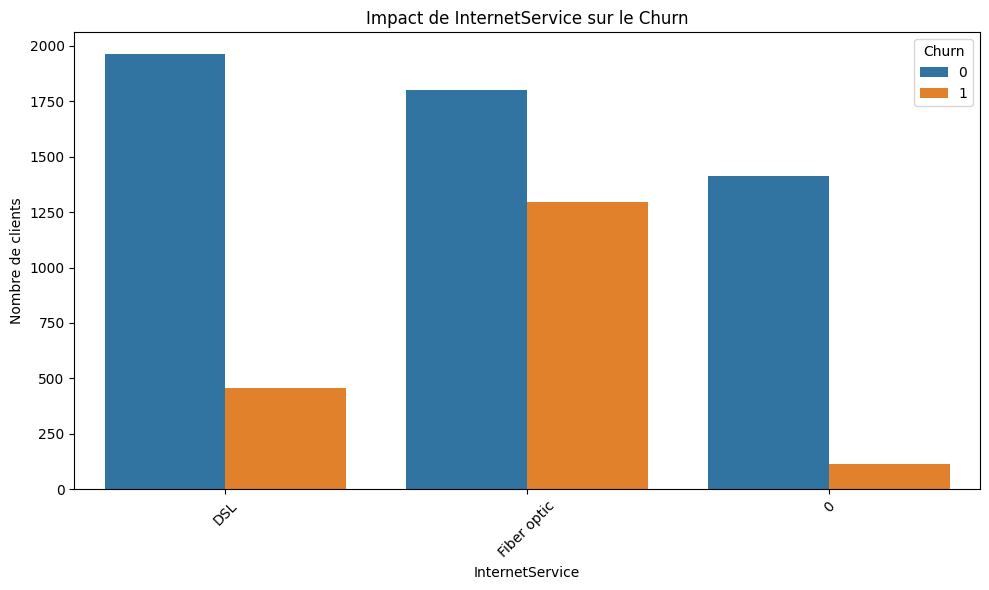

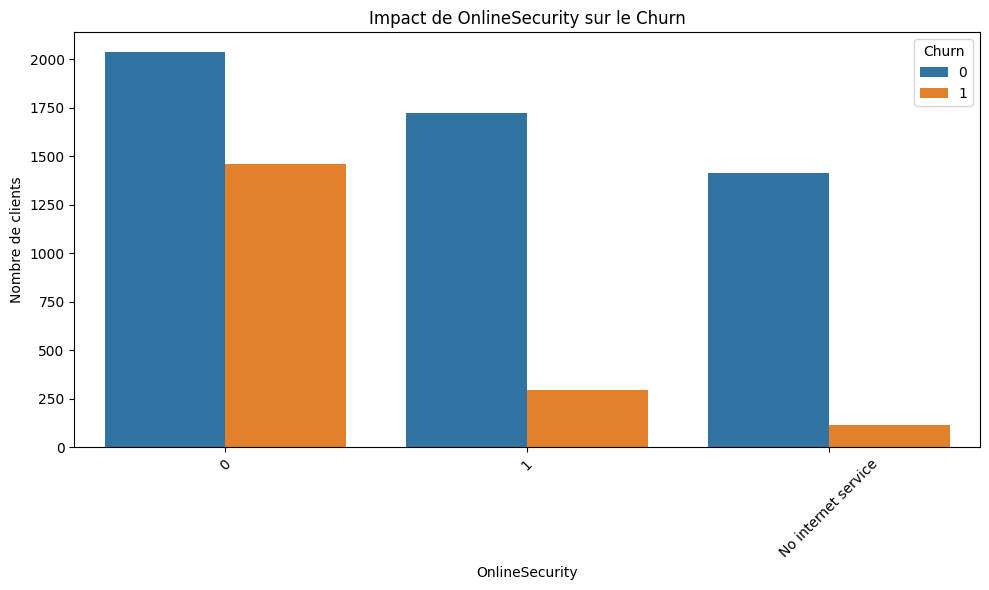

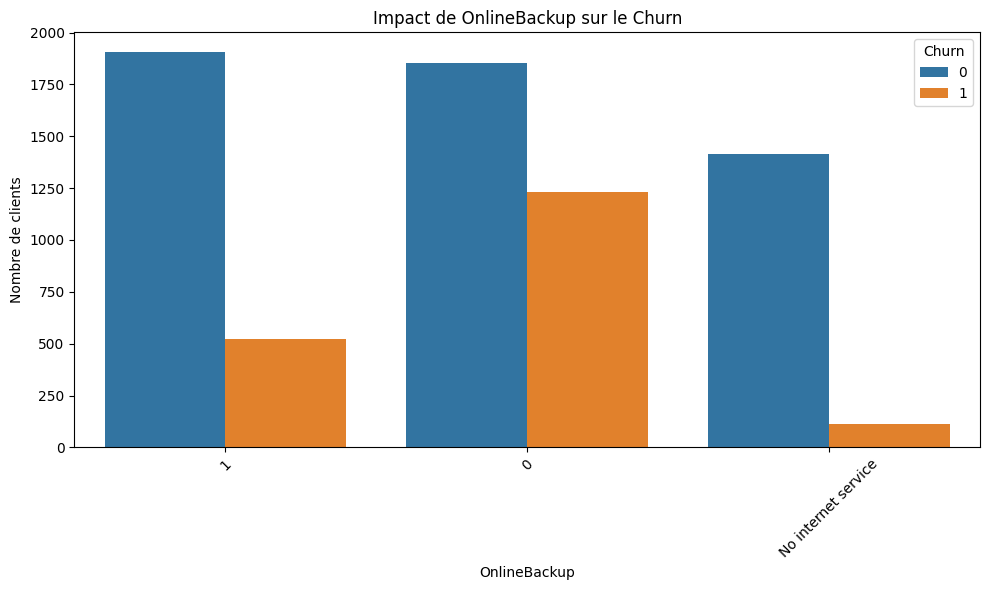

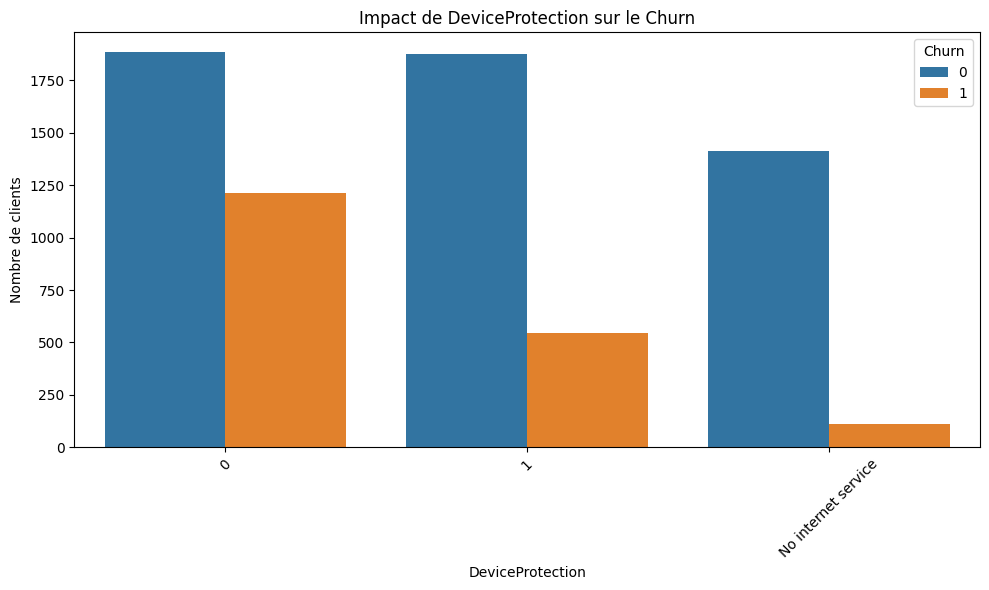

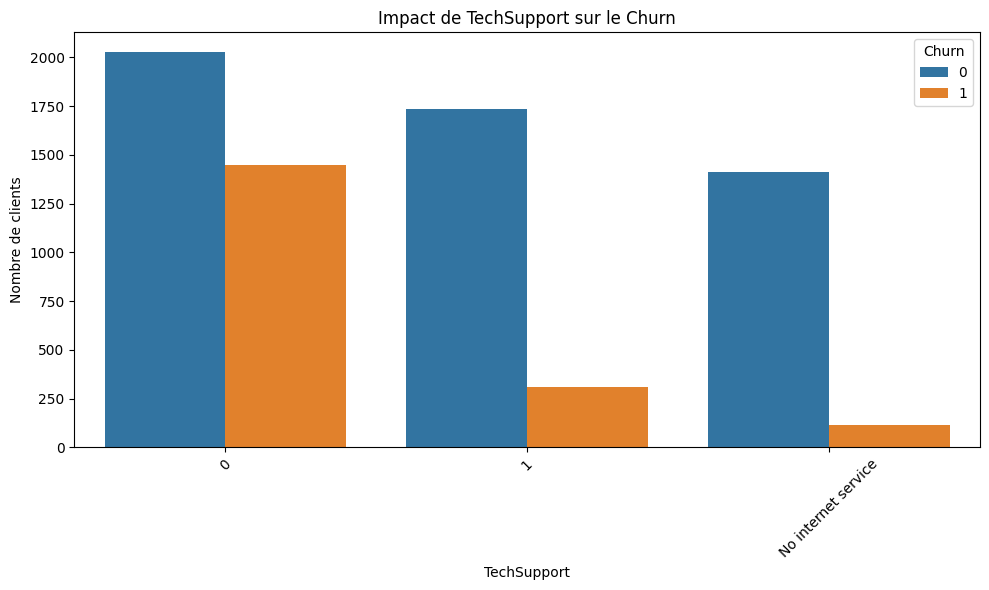

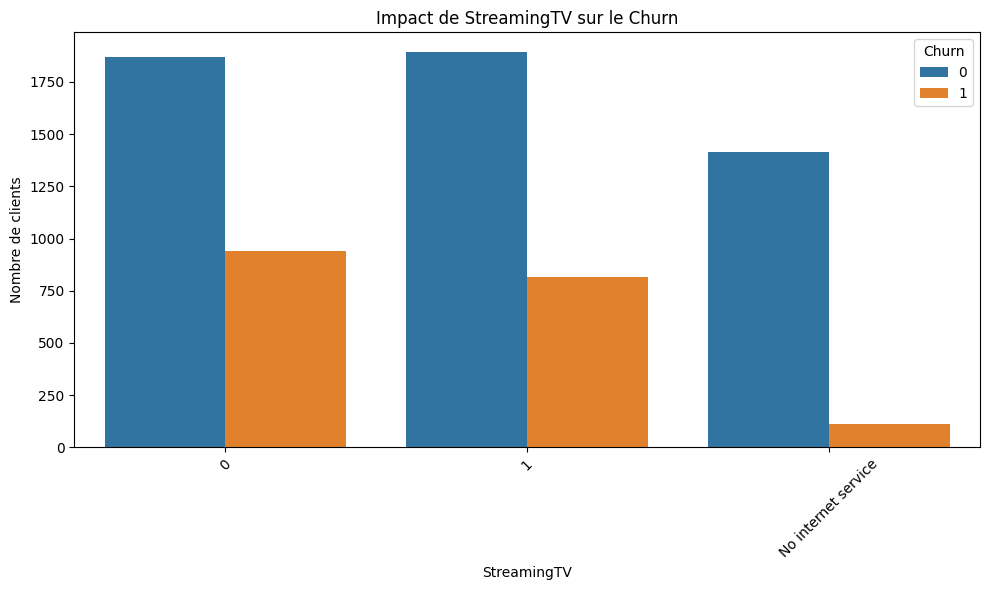

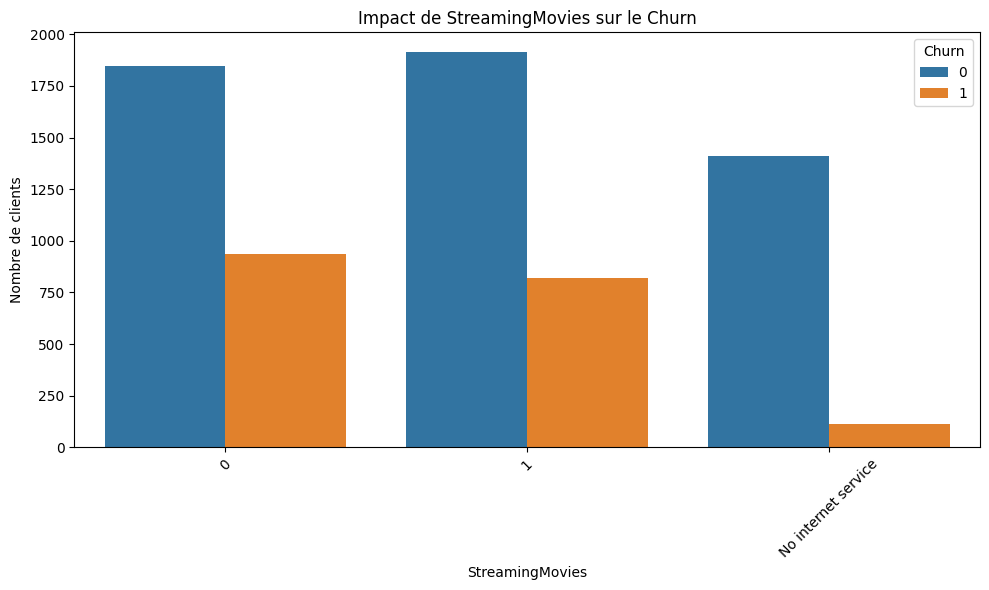

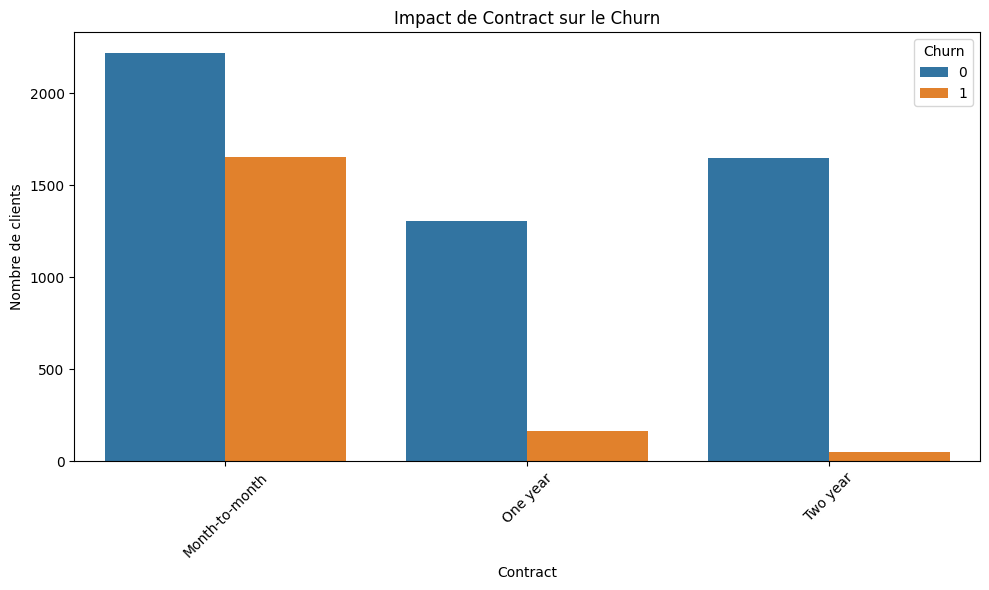

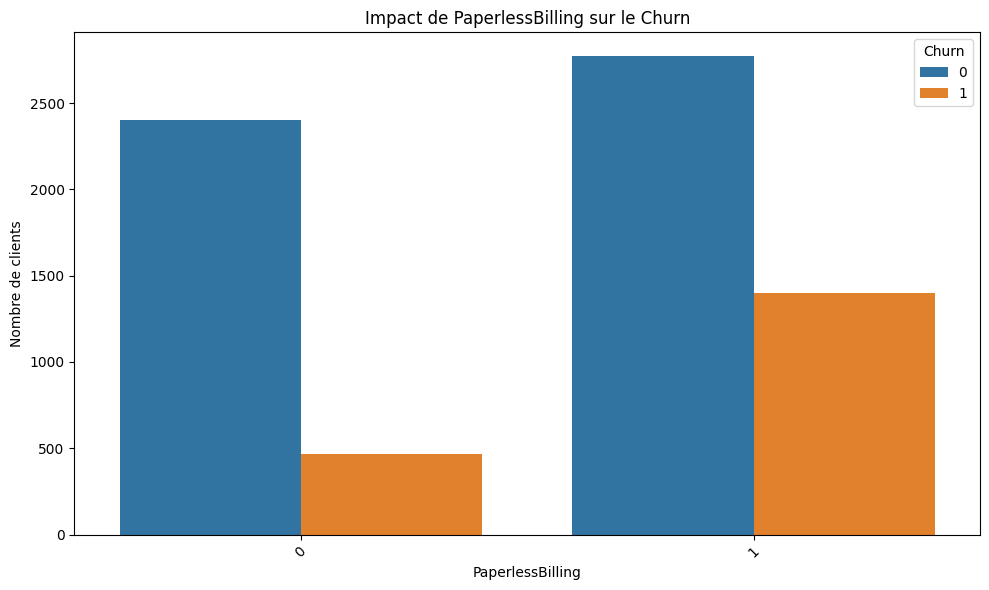

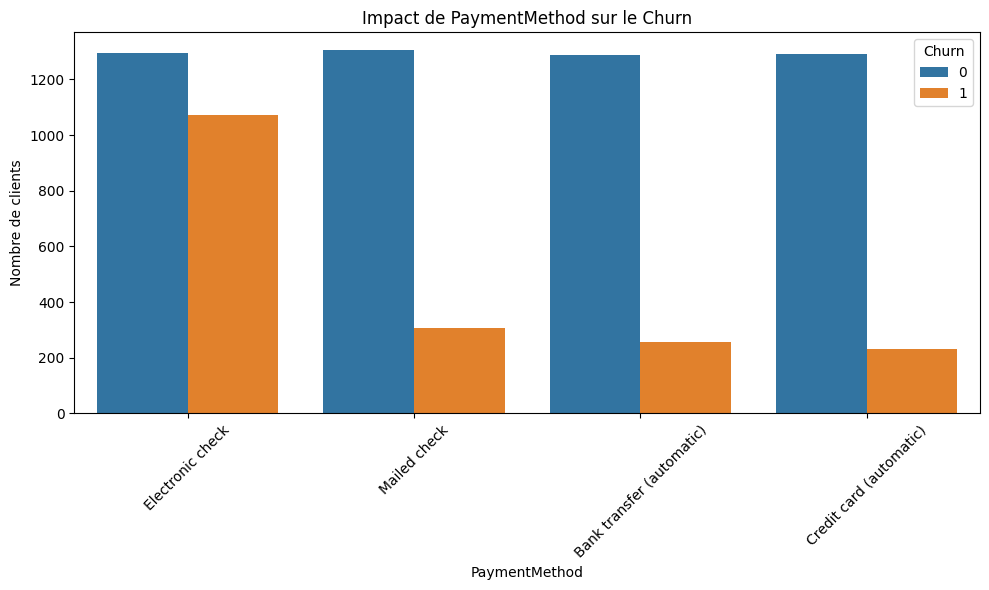

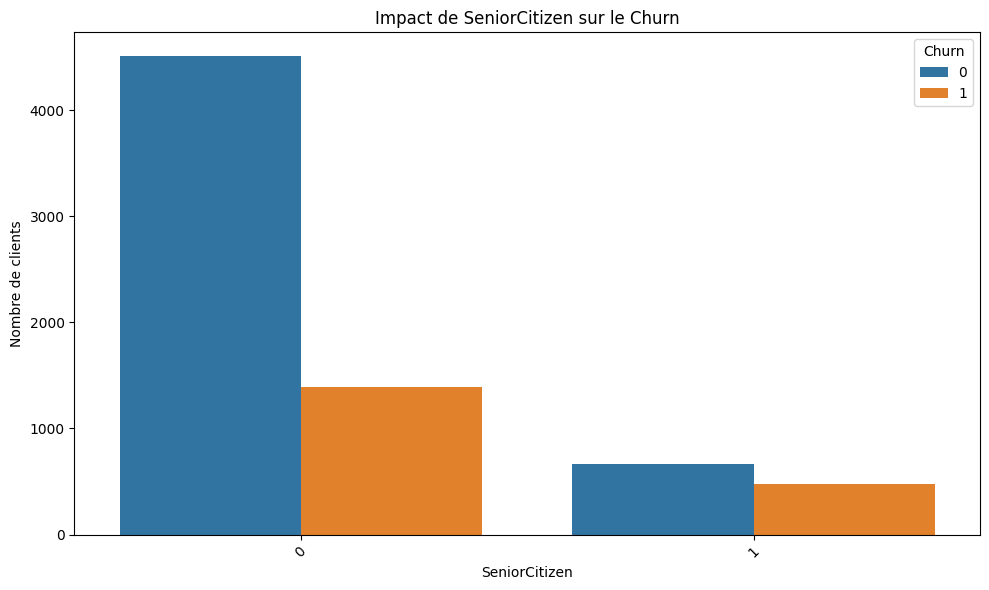

In [21]:
# Liste des colonnes catégorielles (à adapter selon votre dataset)
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

# Graphiques countplot pour chaque colonne catégorielle
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, hue='Churn')
    plt.title(f"Impact de {col} sur le Churn")
    plt.xlabel(col)
    plt.ylabel('Nombre de clients')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Relation entre `tenure` et `MonthlyCharges`
Nous traçons un nuage de points pour visualiser la relation entre :
- `tenure` : la durée d'abonnement (en mois).
- `MonthlyCharges` : les factures mensuelles.
Les points sont colorés par `Churn` pour mieux comprendre les différences entre les clients ayant résilié et ceux restants.

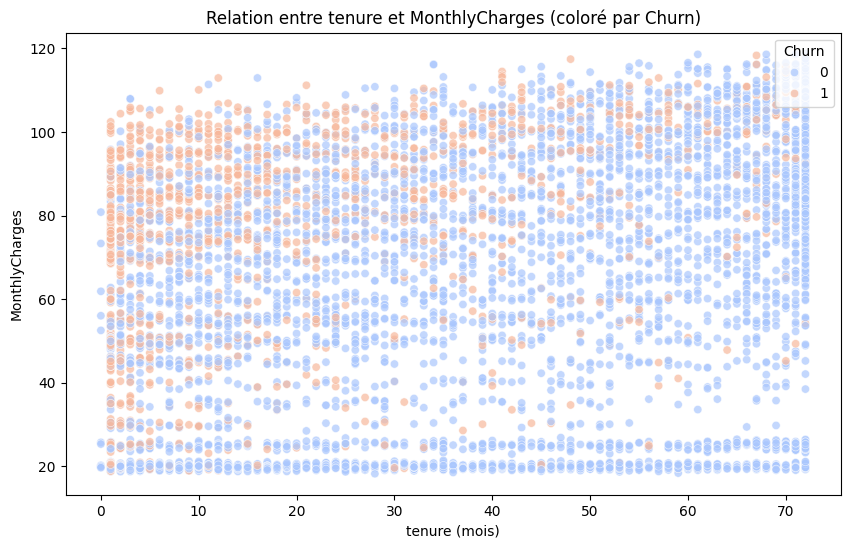

In [22]:
# Nuage de points pour explorer la relation entre tenure (durée d'abonnement) et MonthlyCharges (factures mensuelles)
# Les points sont colorés en fonction de la variable Churn pour observer les différences entre clients restants et partants
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges', hue='Churn', palette='coolwarm', alpha=0.7)
plt.title('Relation entre tenure et MonthlyCharges (coloré par Churn)')
plt.xlabel('tenure (mois)')
plt.ylabel('MonthlyCharges')
plt.legend(title='Churn', loc='upper right')
plt.show()

**Note** : Bien que ce graphique de nuage de points permette de visualiser la relation entre `tenure` et `MonthlyCharges`, il est limité dans sa capacité à révéler des tendances claires, notamment en raison de la densité des points. Des visualisations alternatives, comme des diagrammes de densité (KDE), ont été utilisées par la suite pour fournir une meilleure compréhension des relations.

### Relation entre `tenure` et `TotalCharges`
Ce graphique explore la relation entre :
- `tenure` : la durée d'abonnement.
- `TotalCharges` : le montant total facturé.
Les points sont colorés selon `Churn` pour observer les schémas associés à la résiliation.

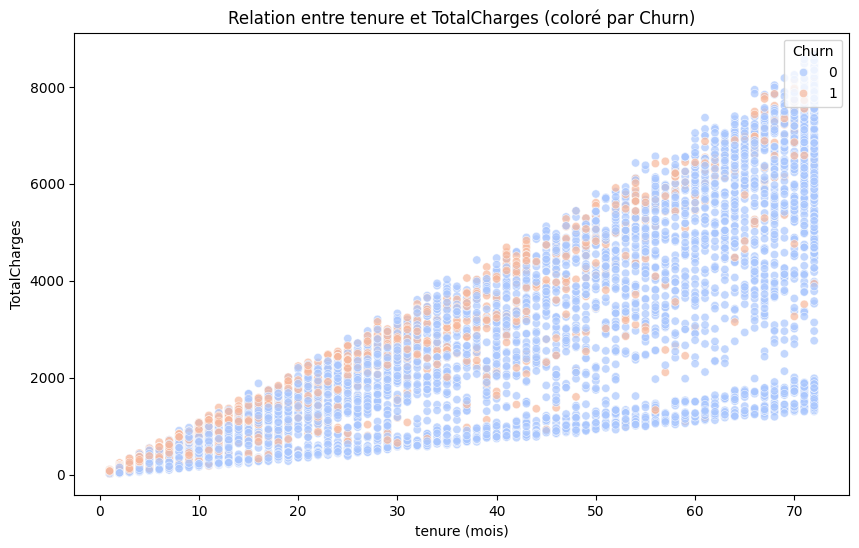

In [23]:
# Nuage de points pour explorer la relation entre tenure (durée d'abonnement) et TotalCharges (total facturé)
# Les points sont colorés en fonction de la variable Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tenure', y='TotalCharges', hue='Churn', palette='coolwarm', alpha=0.7)
plt.title('Relation entre tenure et TotalCharges (coloré par Churn)')
plt.xlabel('tenure (mois)')
plt.ylabel('TotalCharges')
plt.legend(title='Churn', loc='upper right')
plt.show()

**Note** : Ce graphique montre une relation logique entre `tenure` et `TotalCharges` (puisque ces deux variables sont fortement corrélées). Cependant, en raison de cette corrélation, ce graphique n'apporte pas d'informations supplémentaires sur le churn. Par conséquent, d'autres visualisations, comme les graphiques axés sur `MonthlyCharges` ou les variables catégorielles, ont été explorées pour mieux comprendre les comportements des clients.

### Densité entre `tenure` et `MonthlyCharges`
La carte de densité montre où les clients se concentrent dans l'espace `tenure`-`MonthlyCharges`. Cela permet d'identifier :
- Les zones où les clients ayant résilié (`Churn=1`) sont plus présents.
- Les différences de comportement entre les clients ayant résilié et ceux restant.

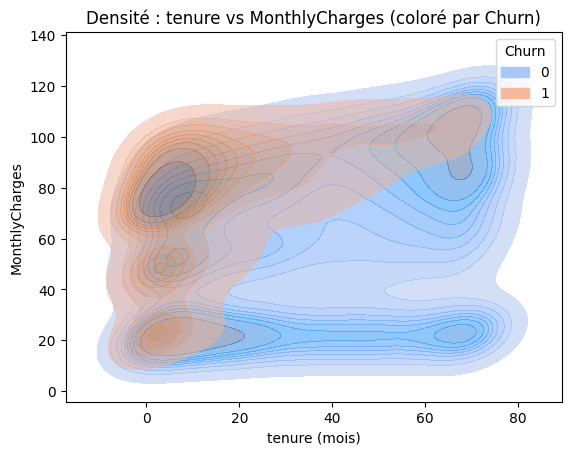

In [24]:
# Visualisation de la densité (KDE) entre tenure et MonthlyCharges, colorée par la variable Churn
# Les zones de forte densité montrent où les clients sont concentrés
sns.kdeplot(data=data, x='tenure', y='MonthlyCharges', hue='Churn', fill=True, palette='coolwarm', alpha=0.5)
plt.title('Densité : tenure vs MonthlyCharges (coloré par Churn)')
plt.xlabel('tenure (mois)')
plt.ylabel('MonthlyCharges')
plt.show()

### Distribution des `MonthlyCharges` par `Churn`
Ce boxplot compare la distribution des factures mensuelles (`MonthlyCharges`) entre les clients ayant résilié (`Churn=1`) et ceux restants (`Churn=0`). Les boîtes montrent les médianes et les intervalles interquartiles (IQR).

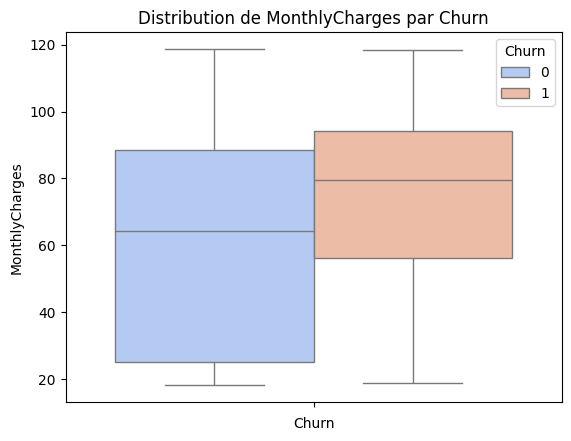

In [25]:
# Boxplot pour comparer la distribution des factures mensuelles (MonthlyCharges) entre les clients churn (1) et non-churn (0)
sns.boxplot(data=data, hue='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Distribution de MonthlyCharges par Churn')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.show()

## Conclusion

Cette analyse a permis de mettre en évidence plusieurs observations intéressantes concernant les facteurs influençant le churn des clients :

1. **Tenure (durée d'abonnement)** :
   - La durée d'abonnement est la variable la plus corrélée négativement avec le churn. Les clients ayant une faible durée d'engagement (< 20 mois) sont les plus susceptibles de résilier.

2. **Factures et charges** :
   - Les clients avec des factures mensuelles élevées (`MonthlyCharges`) présentent un risque accru de churn, notamment lorsqu'ils ont une faible durée d'abonnement.
   - Bien que les charges totales (`TotalCharges`) soient aussi liées au churn, elles reflètent souvent des clients avec une longue durée d'engagement et des contrats stables, ce qui en fait une variable plus ambivalente.

3. **Services Internet et options souscrites** :
   - Les clients utilisant la fibre optique comme type de service Internet montrent un taux de churn plus élevé que ceux utilisant DSL.
   - Le churn est également plus élevé chez les clients qui ne souscrivent pas à des services supplémentaires tels que la sécurité en ligne, la sauvegarde en ligne, la protection des appareils ou le support technique.

4. **Types de contrat** :
   - Les contrats mensuels (`Month-to-month`) sont fortement associés à un churn élevé, tandis que les contrats à plus longue durée (1 ou 2 ans) favorisent la fidélité.

5. **Méthodes de paiement** :
   - Le nombre de clients n'ayant pas résilié est équitable entre les différentes méthodes de paiement. Cependant, parmi les clients ayant résilié, ceux utilisant `Electronic Check` sont les plus nombreux, ce qui influe sur le ratio global de churn pour cette méthode.

6. **Senior Citizen** :
   - Bien que les clients seniors montrent un taux de churn plus élevé, cette catégorie représente une proportion relativement faible de la clientèle et pourrait être négligeable dans l’analyse globale.

### Réflexion finale
Ces résultats montrent des tendances intéressantes qui méritent d’être creusées davantage. Bien que certaines observations, comme la corrélation entre `Tenure` et `Churn`, soient significatives, d’autres aspects, tels que les relations complexes entre les charges totales et le churn, demandent une exploration plus approfondie.  

Les tendances identifiées ici offrent des pistes prometteuses pour guider des stratégies de rétention, notamment pour mieux comprendre :
- Les besoins des clients ayant des contrats mensuels et des charges élevées.
- L’impact de la fibre optique sur le churn.
- L’importance des services supplémentaires dans la fidélisation des clients.

Cependant, des analyses complémentaires seraient nécessaires pour tirer des conclusions définitives et établir des actions concrètes.